In [59]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = 300
pd.options.display.max_rows = 300
pd.set_option('display.max_colwidth',300)

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn import metrics
import sys
sys.setrecursionlimit(100000)

import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
data = pd.read_csv('/Users/satokosuda/dataforcause/dataset.csv')

In [3]:
# Drop features with text sentences because I don't try text clustering at this stage.
data = \
data.drop(['Tent ID','Family Bacgkround','Problems in the Tent - Additional Comments','Do you have any other comments, questions or other information you’d like to add?','Would living in a block home create any changes in your life?','Additional Comments - Health'],axis=1)

In [4]:
# Just for the sake of excercise, let's visualize the distribution of each feature to learn which transformation is apporpriate.
# It's easier to transform all features to center in zero and divided by unit variance (using 'scale' as below). However, we may improve
# algorithm performance by customizing transformation for each feature.

# Also I can try other clustering methods(ideally Euclidian distance models since otherwise I have to redo feature
# engineering to accomodate other models)

In [5]:
# Data1 standardise all features including sparse features (turn them into dense feature)
data1 = pd.DataFrame(scale(data), columns=data.columns)

/Users/satokosuda/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  from ipykernel import kernelapp as app


In [6]:
data1.tail()

,# of Tent Residents,# of Years Living in Village,# of Years Living in Tent,How often do you get sick?,"How often do you have friends, family or neighborhoods over to your tent?",HH1 Female,HH1 Male,HH1 Agriculture/Fish,HH1 Contracted Worker,HH1 Driver,HH1 Family Provides,HH1 Laundry / Servant,HH1 Laundry/Housekeeper,HH1 Lesiv/Servant,HH1 Nothing,HH1 Other,HH1 Paid Consistent Job,HH1 Small business outside or nearby the home,HH1 Student,HH1 Vendor,Sleep Length,Number of Residents with Income,Do you normally wake up at night?,Do you ever have trouble staying awake during the day?,Underage kids in the family %,Water Usage (gallon) per resident per day,Children Living Elsewhere No,Children Living Elsewhere Yes,Rent or Own Elsewhere No,Rent or Own Elsewhere Yes,Kids Education No,Kids Education No Response,Kids Education Some,Kids Education Yes,Ownership Other,Ownership Yes,Ownership Rent,Previous Ownership Live with Family,Previous Ownership No Response,Previous Ownership Other,Previous Ownership Own House,Previous Ownership Rent,Marital Status Common Law,Marital Status Married,Marital Status Other,Marital Status Single,Marital Status Widow,Suffer from cough or congestion? No,Suffer from cough or congestion? Yes,Suffer from bronchitis or pneumonia? No,Suffer from bronchitis or pneumonia? Yes,Suffer from diarrhea? No,Suffer from diarrhea? No Response,Suffer from diarrhea? Yes,Do you have access to a latrine? No,Do you have access to a latrine? Yes,Do you have electricity in your tent? No,Do you have electricity in your tent? Yes,Main source of drinking water:Buy,Main source of drinking water:No,Main source of drinking water:Pump or well,"Main source of drinking water:Pump, well, or buy",Do you ever drink water that isn't treated? No Response,Do you ever drink water that isn't treated? No,Do you ever drink water that isn't treated? Yes,Is there any risk that the tent will collapse? No,Is there any risk that the tent will collapse? Yes,In the past year did someone enter your house to steal something? No,In the past year did someone enter your house to steal something? Yes,Do you have space to lie down if tired? No,Do you have space to lie down if tired? Yes,Do people living in the tent have space to keep their personal belongings? No,Do people living in the tent have space to keep their personal belongings? Yes,"In this tent, if someone wakes up, do they wake up the other people? No","In this tent, if someone wakes up, do they wake up the other people? Yes",Do children have safe places to study? No,Do children have safe places to study? Yes,Does your household own any animals? No,Does your household own any animals? Yes,Does your household own a radio? No,Does your household own a radio? Yes,Do you feel safe in your home? No,Do you feel safe in your home? Yes,Do you feel safe leaving your children alone at home? No,Do you feel safe leaving your children alone at home? Yes,Do you feel safe walking in the community at night? No,Do you feel safe walking in the community at night? Yes,Do you own the land the tent is on? No,Do you own the land the tent is on? Yes,"If you were to receive a house, would you be willing to move to the area behind Healing Haiti? No","If you were to receive a house, would you be willing to move to the area behind Healing Haiti? Yes",Do you feel this person qualifies for a home? No,Do you feel this person qualifies for a home? Yes,"What are the dwellings floors made of? Ceramic, wood, concrete",What are the dwellings floors made of? Dirt or soil,What are the dwellings roof made of? Tarp,What are the dwellings roof made of? Tin
521,-0.488240,-0.434635,-2.665435,0.143174,0.114311,-1.302857,1.302857,-0.237118,2.378703,-0.06178,-0.043644,-0.075737,-0.06178,-0.043644,-0.658212,-0.358825,-0.198811,-0.664151,-0.107417,-0.087538,-0.102947,0.791420,-0.513396,0.946908,-0.245620,-0.337793,0.549527,-0.549527,0.06178,-0.06178,1.990544,-0.378785,-0.643412,-0.783260,-0.116136,0.324102,-0.298374,-0.324102,-0.075737,-0.075737,-0

In [7]:
#Data2 standardise all features except sparse features
data_standard = \
data.loc[:,['# of Tent Residents','# of Years Living in Village','# of Years Living in Tent','How often do you get sick?','How often do you have friends, family or neighborhoods over to your tent?','Do you normally wake up at night?','Do you ever have trouble staying awake during the day?','Underage kids in the family %','Water Usage (gallon) per resident per day','Sleep Length','Number of Residents with Income']]
data_scaled = pd.DataFrame(scale(data_standard), columns=data_standard.columns)

/Users/satokosuda/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()


In [8]:
data_noscaled = \
data.drop(['# of Tent Residents','# of Years Living in Village','# of Years Living in Tent','How often do you get sick?','How often do you have friends, family or neighborhoods over to your tent?','Do you normally wake up at night?','Do you ever have trouble staying awake during the day?','Underage kids in the family %','Water Usage (gallon) per resident per day','Sleep Length','Number of Residents with Income'], axis=1)

In [9]:
data2 = pd.concat([data_scaled, data_noscaled], axis=1)

In [10]:
data2.head()

,# of Tent Residents,# of Years Living in Village,# of Years Living in Tent,How often do you get sick?,"How often do you have friends, family or neighborhoods over to your tent?",Do you normally wake up at night?,Do you ever have trouble staying awake during the day?,Underage kids in the family %,Water Usage (gallon) per resident per day,Sleep Length,Number of Residents with Income,HH1 Female,HH1 Male,HH1 Agriculture/Fish,HH1 Contracted Worker,HH1 Driver,HH1 Family Provides,HH1 Laundry / Servant,HH1 Laundry/Housekeeper,HH1 Lesiv/Servant,HH1 Nothing,HH1 Other,HH1 Paid Consistent Job,HH1 Small business outside or nearby the home,HH1 Student,HH1 Vendor,Children Living Elsewhere No,Children Living Elsewhere Yes,Rent or Own Elsewhere No,Rent or Own Elsewhere Yes,Kids Education No,Kids Education No Response,Kids Education Some,Kids Education Yes,Ownership Other,Ownership Yes,Ownership Rent,Previous Ownership Live with Family,Previous Ownership No Response,Previous Ownership Other,Previous Ownership Own House,Previous Ownership Rent,Marital Status Common Law,Marital Status Married,Marital Status Other,Marital Status Single,Marital Status Widow,Suffer from cough or congestion? No,Suffer from cough or congestion? Yes,Suffer from bronchitis or pneumonia? No,Suffer from bronchitis or pneumonia? Yes,Suffer from diarrhea? No,Suffer from diarrhea? No Response,Suffer from diarrhea? Yes,Do you have access to a latrine? No,Do you have access to a latrine? Yes,Do you have electricity in your tent? No,Do you have electricity in your tent? Yes,Main source of drinking water:Buy,Main source of drinking water:No,Main source of drinking water:Pump or well,"Main source of drinking water:Pump, well, or buy",Do you ever drink water that isn't treated? No Response,Do you ever drink water that isn't treated? No,Do you ever drink water that isn't treated? Yes,Is there any risk that the tent will collapse? No,Is there any risk that the tent will collapse? Yes,In the past year did someone enter your house to steal something? No,In the past year did someone enter your house to steal something? Yes,Do you have space to lie down if tired? No,Do you have space to lie down if tired? Yes,Do people living in the tent have space to keep their personal belongings? No,Do people living in the tent have space to keep their personal belongings? Yes,"In this tent, if someone wakes up, do they wake up the other people? No","In this tent, if someone wakes up, do they wake up the other people? Yes",Do children have safe places to study? No,Do children have safe places to study? Yes,Does your household own any animals? No,Does your household own any animals? Yes,Does your household own a radio? No,Does your household own a radio? Yes,Do you feel safe in your home? No,Do you feel safe in your home? Yes,Do you feel safe leaving your children alone at home? No,Do you feel safe leaving your children alone at home? Yes,Do you feel safe walking in the community at night? No,Do you feel safe walking in the community at night? Yes,Do you own the land the tent is on? No,Do you own the land the tent is on? Yes,"If you were to receive a house, would you be willing to move to the area behind Healing Haiti? No","If you were to receive a house, would you be willing to move to the area behind Healing Haiti? Yes",Do you feel this person qualifies for a home? No,Do you feel this person qualifies for a home? Yes,"What are the dwellings floors made of? Ceramic, wood, concrete",What are the dwellings floors made of? Dirt or soil,What are the dwellings roof made of? Tarp,What are the dwellings roof made of? Tin
0,-0.488240,4.217744,0.664776,1.894552,0.114311,2.676129,0.279249,1.078692,0.088563,-0.102947,-0.867094,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,

In [11]:
samples, features = data1.shape
print(samples, features)

526 97


In [12]:
samples, features = data2.shape
print(samples, features)

526 97


In [13]:
model1 = KMeans(init='k-means++', n_clusters =2, n_init=10, max_iter=500).fit(data1)
model2 = KMeans(init='k-means++', n_clusters =9, n_init=10, max_iter=500).fit(data1)
model3 = KMeans(init='k-means++', n_clusters =20, n_init=10, max_iter=500).fit(data1)

In [14]:
# -1 indicates the poorest while 1 indicates the best. metrics close to 0 
# indicates overwrap in cluster memberships
metrics.silhouette_score(data1, model1.labels_, metric='euclidean')

0.06567160253298794

In [15]:
# Score close to 0 indicates the better partition
metrics.davies_bouldin_score(data1, model1.labels_)

/Users/satokosuda/anaconda/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


3.6723407087615128

In [16]:
# the higher the score, the better the fit
metrics.calinski_harabaz_score(data1, model1.labels_)

30.92956852138657

In [17]:
# Increasing the number of partitions doesn't improve the quality of clustering
print(metrics.silhouette_score(data1, model2.labels_, metric='euclidean'),metrics.davies_bouldin_score(data1, model2.labels_),metrics.calinski_harabaz_score(data1, model2.labels_),metrics.silhouette_score(data1, model3.labels_, metric='euclidean'),metrics.davies_bouldin_score(data1, model3.labels_),metrics.calinski_harabaz_score(data1, model3.labels_))

0.04079441000705332 2.4882291406990498 18.894232252219332 0.027779087892542194 2.230400807020892 15.311939655138572


/Users/satokosuda/anaconda/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/satokosuda/anaconda/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [18]:
model1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,

In [19]:
labels = pd.DataFrame(model1.labels_, index = np.array(range(0,526)), columns=['labels'])

In [20]:
result = data.join(labels)

In [21]:
result.sample(5)

,# of Tent Residents,# of Years Living in Village,# of Years Living in Tent,How often do you get sick?,"How often do you have friends, family or neighborhoods over to your tent?",HH1 Female,HH1 Male,HH1 Agriculture/Fish,HH1 Contracted Worker,HH1 Driver,HH1 Family Provides,HH1 Laundry / Servant,HH1 Laundry/Housekeeper,HH1 Lesiv/Servant,HH1 Nothing,HH1 Other,HH1 Paid Consistent Job,HH1 Small business outside or nearby the home,HH1 Student,HH1 Vendor,Sleep Length,Number of Residents with Income,Do you normally wake up at night?,Do you ever have trouble staying awake during the day?,Underage kids in the family %,Water Usage (gallon) per resident per day,Children Living Elsewhere No,Children Living Elsewhere Yes,Rent or Own Elsewhere No,Rent or Own Elsewhere Yes,Kids Education No,Kids Education No Response,Kids Education Some,Kids Education Yes,Ownership Other,Ownership Yes,Ownership Rent,Previous Ownership Live with Family,Previous Ownership No Response,Previous Ownership Other,Previous Ownership Own House,Previous Ownership Rent,Marital Status Common Law,Marital Status Married,Marital Status Other,Marital Status Single,Marital Status Widow,Suffer from cough or congestion? No,Suffer from cough or congestion? Yes,Suffer from bronchitis or pneumonia? No,Suffer from bronchitis or pneumonia? Yes,Suffer from diarrhea? No,Suffer from diarrhea? No Response,Suffer from diarrhea? Yes,Do you have access to a latrine? No,Do you have access to a latrine? Yes,Do you have electricity in your tent? No,Do you have electricity in your tent? Yes,Main source of drinking water:Buy,Main source of drinking water:No,Main source of drinking water:Pump or well,"Main source of drinking water:Pump, well, or buy",Do you ever drink water that isn't treated? No Response,Do you ever drink water that isn't treated? No,Do you ever drink water that isn't treated? Yes,Is there any risk that the tent will collapse? No,Is there any risk that the tent will collapse? Yes,In the past year did someone enter your house to steal something? No,In the past year did someone enter your house to steal something? Yes,Do you have space to lie down if tired? No,Do you have space to lie down if tired? Yes,Do people living in the tent have space to keep their personal belongings? No,Do people living in the tent have space to keep their personal belongings? Yes,"In this tent, if someone wakes up, do they wake up the other people? No","In this tent, if someone wakes up, do they wake up the other people? Yes",Do children have safe places to study? No,Do children have safe places to study? Yes,Does your household own any animals? No,Does your household own any animals? Yes,Does your household own a radio? No,Does your household own a radio? Yes,Do you feel safe in your home? No,Do you feel safe in your home? Yes,Do you feel safe leaving your children alone at home? No,Do you feel safe leaving your children alone at home? Yes,Do you feel safe walking in the community at night? No,Do you feel safe walking in the community at night? Yes,Do you own the land the tent is on? No,Do you own the land the tent is on? Yes,"If you were to receive a house, would you be willing to move to the area behind Healing Haiti? No","If you were to receive a house, would you be willing to move to the area behind Healing Haiti? Yes",Do you feel this person qualifies for a home? No,Do you feel this person qualifies for a home? Yes,"What are the dwellings floors made of? Ceramic, wood, concrete",What are the dwellings floors made of? Dirt or soil,What are the dwellings roof made of? Tarp,What are the dwellings roof made of? Tin,labels
116,3,28,7.0,3,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0,3,0.333333,6.666667,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.

In [22]:
reduced_data1 = PCA(n_components = 20, svd_solver = 'auto', copy = True).fit_transform(data1)

In [23]:
model4 = KMeans(init='k-means++', n_clusters =2, n_init=10, max_iter=500).fit(reduced_data1)

In [24]:
#After PCA data transformation, partition improved
print(metrics.silhouette_score(reduced_data1, model4.labels_, metric='euclidean'),metrics.davies_bouldin_score(reduced_data1, model4.labels_), metrics.calinski_harabaz_score(reduced_data1, model4.labels_))

0.11330764150562513 2.690394087901123 53.149116751064874


/Users/satokosuda/anaconda/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [25]:
reduced_data2 = PCA(n_components = 10, svd_solver = 'auto', copy = True).fit_transform(data1)

In [26]:
model5 = KMeans(init='k-means++', n_clusters =2, n_init=10, max_iter=500).fit(reduced_data2)

In [27]:
# Perform better than model4
print(metrics.silhouette_score(reduced_data2, model5.labels_, metric='euclidean'),metrics.davies_bouldin_score(reduced_data2, model5.labels_), metrics.calinski_harabaz_score(reduced_data2, model5.labels_))

0.17700449678433464 2.0916396939534145 84.82357000663762


/Users/satokosuda/anaconda/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [28]:
reduced_data3 = PCA(n_components = 5, svd_solver = 'auto', copy = True).fit_transform(data1)

In [29]:
model6 = KMeans(init='k-means++', n_clusters =2, n_init=10, max_iter=500).fit(reduced_data3)

In [30]:
#Perform much better tahn model4
print(metrics.silhouette_score(reduced_data3, model6.labels_, metric='euclidean'),metrics.davies_bouldin_score(reduced_data3, model6.labels_), metrics.calinski_harabaz_score(reduced_data3, model6.labels_))

0.2826003714948699 1.4832273917738716 147.4872895453975


/Users/satokosuda/anaconda/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [31]:
reduced_data4 = PCA(n_components = 4, svd_solver = 'auto', copy = True).fit_transform(data1)

In [32]:
model7 = KMeans(init='k-means++', n_clusters =2, n_init=10, max_iter=500).fit(reduced_data4)

In [33]:
# Perform even better
print(metrics.silhouette_score(reduced_data4, model7.labels_, metric='euclidean'),metrics.davies_bouldin_score(reduced_data4, model7.labels_), metrics.calinski_harabaz_score(reduced_data4, model7.labels_))

0.31956101623771643 1.338368710351149 181.1184990807927


/Users/satokosuda/anaconda/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [34]:
reduced_data5 = PCA(n_components = 3, svd_solver = 'auto', copy = True).fit_transform(data1)

In [35]:
model8 = KMeans(init='k-means++', n_clusters =2, n_init=10, max_iter=500).fit(reduced_data5)

In [36]:
# The further reduce the dementions, the better K-mean cluster performs
print(metrics.silhouette_score(reduced_data5, model8.labels_, metric='euclidean'),metrics.davies_bouldin_score(reduced_data5, model8.labels_), metrics.calinski_harabaz_score(reduced_data5, model8.labels_))

0.37564417950249346 1.159584178198143 236.56287292857277


/Users/satokosuda/anaconda/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [37]:
reduced_data6 = PCA(n_components = 2, svd_solver = 'auto', copy = True).fit_transform(data1)

In [38]:
model9 = KMeans(init='k-means++', n_clusters =2, n_init=10, max_iter=500).fit(reduced_data6)

In [39]:
# Still improves
print(metrics.silhouette_score(reduced_data6, model9.labels_, metric='euclidean'),metrics.davies_bouldin_score(reduced_data6, model9.labels_), metrics.calinski_harabaz_score(reduced_data6, model9.labels_))

0.47520214702815544 0.8624621164189977 357.6859798363561


/Users/satokosuda/anaconda/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [40]:
model10 = KMeans(init='k-means++', n_clusters =5, n_init=10, max_iter=500).fit(reduced_data6)

In [41]:
print(metrics.silhouette_score(reduced_data6, model10.labels_, metric='euclidean'),metrics.davies_bouldin_score(reduced_data6, model10.labels_), metrics.calinski_harabaz_score(reduced_data6, model10.labels_))

0.45730118229066413 0.7758782920161339 698.7837015434982


/Users/satokosuda/anaconda/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [42]:
model11 = KMeans(init='k-means++', n_clusters =4, n_init=10, max_iter=500).fit(reduced_data6)

In [43]:
# Still improves
print(metrics.silhouette_score(reduced_data6, model11.labels_, metric='euclidean'),metrics.davies_bouldin_score(reduced_data6, model11.labels_), metrics.calinski_harabaz_score(reduced_data6, model11.labels_))

0.5524269059293337 0.7684854457439857 730.0517079417732


/Users/satokosuda/anaconda/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [44]:
model12 = KMeans(init='k-means++', n_clusters =3, n_init=10, max_iter=500).fit(reduced_data6)

In [45]:
# This is the best result so far
print(metrics.silhouette_score(reduced_data6, model12.labels_, metric='euclidean'),metrics.davies_bouldin_score(reduced_data6, model12.labels_), metrics.calinski_harabaz_score(reduced_data6, model12.labels_))

0.5610981333811009 0.6067453347806976 722.6746741834263


/Users/satokosuda/anaconda/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [46]:
labels_best = pd.DataFrame(model12.labels_, index = np.array(range(0,526)), columns=['labels'])

In [47]:
result_best = data.join(labels_best)

In [48]:
result_best.head(10) #label 1-Not qualified for home 0-qualified for home

,# of Tent Residents,# of Years Living in Village,# of Years Living in Tent,How often do you get sick?,"How often do you have friends, family or neighborhoods over to your tent?",HH1 Female,HH1 Male,HH1 Agriculture/Fish,HH1 Contracted Worker,HH1 Driver,HH1 Family Provides,HH1 Laundry / Servant,HH1 Laundry/Housekeeper,HH1 Lesiv/Servant,HH1 Nothing,HH1 Other,HH1 Paid Consistent Job,HH1 Small business outside or nearby the home,HH1 Student,HH1 Vendor,Sleep Length,Number of Residents with Income,Do you normally wake up at night?,Do you ever have trouble staying awake during the day?,Underage kids in the family %,Water Usage (gallon) per resident per day,Children Living Elsewhere No,Children Living Elsewhere Yes,Rent or Own Elsewhere No,Rent or Own Elsewhere Yes,Kids Education No,Kids Education No Response,Kids Education Some,Kids Education Yes,Ownership Other,Ownership Yes,Ownership Rent,Previous Ownership Live with Family,Previous Ownership No Response,Previous Ownership Other,Previous Ownership Own House,Previous Ownership Rent,Marital Status Common Law,Marital Status Married,Marital Status Other,Marital Status Single,Marital Status Widow,Suffer from cough or congestion? No,Suffer from cough or congestion? Yes,Suffer from bronchitis or pneumonia? No,Suffer from bronchitis or pneumonia? Yes,Suffer from diarrhea? No,Suffer from diarrhea? No Response,Suffer from diarrhea? Yes,Do you have access to a latrine? No,Do you have access to a latrine? Yes,Do you have electricity in your tent? No,Do you have electricity in your tent? Yes,Main source of drinking water:Buy,Main source of drinking water:No,Main source of drinking water:Pump or well,"Main source of drinking water:Pump, well, or buy",Do you ever drink water that isn't treated? No Response,Do you ever drink water that isn't treated? No,Do you ever drink water that isn't treated? Yes,Is there any risk that the tent will collapse? No,Is there any risk that the tent will collapse? Yes,In the past year did someone enter your house to steal something? No,In the past year did someone enter your house to steal something? Yes,Do you have space to lie down if tired? No,Do you have space to lie down if tired? Yes,Do people living in the tent have space to keep their personal belongings? No,Do people living in the tent have space to keep their personal belongings? Yes,"In this tent, if someone wakes up, do they wake up the other people? No","In this tent, if someone wakes up, do they wake up the other people? Yes",Do children have safe places to study? No,Do children have safe places to study? Yes,Does your household own any animals? No,Does your household own any animals? Yes,Does your household own a radio? No,Does your household own a radio? Yes,Do you feel safe in your home? No,Do you feel safe in your home? Yes,Do you feel safe leaving your children alone at home? No,Do you feel safe leaving your children alone at home? Yes,Do you feel safe walking in the community at night? No,Do you feel safe walking in the community at night? Yes,Do you own the land the tent is on? No,Do you own the land the tent is on? Yes,"If you were to receive a house, would you be willing to move to the area behind Healing Haiti? No","If you were to receive a house, would you be willing to move to the area behind Healing Haiti? Yes",Do you feel this person qualifies for a home? No,Do you feel this person qualifies for a home? Yes,"What are the dwellings floors made of? Ceramic, wood, concrete",What are the dwellings floors made of? Dirt or soil,What are the dwellings roof made of? Tarp,What are the dwellings roof made of? Tin,labels
0,3,60,7.0,4,2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,3,2,0.666667,5.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,

In [49]:
result_best.groupby('labels').mean()
# Group2 is the least qualified for new houses: They have relatively stable family life (married or with common law partners and kids go to school) with better living condition (more space to live confortably, own land tents are on),living in the village for a long time and not willing to move for new house.
# Which is the most qualified for new houses? Compare group 0 and group1:
# 1) Ratio of underage kids in the household > Group 0 is higher 2) More heads of houses are unemployed > Group1 Group 0 has higher rate of female house head with constant jobs 3) Less number of residents are employed > Group1 Group 0 has more resident who works
# 4) Group 1 has the lowest kids education level. Group 0 are more serious about education 5) Group 1 has lowest ownership of the tent and previous ownership of the house 6) Group 1 has the least family stability (least number of married couples) 7) Group 0 suffer of Diarrhea the most
# 8) Group 0 has the lowest access to clean water 9) Group 1 more afraid of theft (although have better housing situations) 10) Higher animal ownership for Group 1... do the animals bring any income? (milk, meat etc)
# 11) Group 1 own radio (luxuary) than Group 0 12)Group 1 has the least sense of safety at home (although they have better housing) Group 0 has the most sense of safety although the worst living condition 13) Group 1 has lowest ownership of the land the tent is on 14) Group 0 has the least confortable housing situation (dirt floor, Tarp roof) and social worker feels they are the most qualified
## Conclusion: Group 0 are working family with stability with seady jobs and kids education, previous house owners, yet doesn't have access to clean water
## and in least favorable housing sotuation. They will be successful if they are provided new houses and opportunities.

,# of Tent Residents,# of Years Living in Village,# of Years Living in Tent,How often do you get sick?,"How often do you have friends, family or neighborhoods over to your tent?",HH1 Female,HH1 Male,HH1 Agriculture/Fish,HH1 Contracted Worker,HH1 Driver,HH1 Family Provides,HH1 Laundry / Servant,HH1 Laundry/Housekeeper,HH1 Lesiv/Servant,HH1 Nothing,HH1 Other,HH1 Paid Consistent Job,HH1 Small business outside or nearby the home,HH1 Student,HH1 Vendor,Sleep Length,Number of Residents with Income,Do you normally wake up at night?,Do you ever have trouble staying awake during the day?,Underage kids in the family %,Water Usage (gallon) per resident per day,Children Living Elsewhere No,Children Living Elsewhere Yes,Rent or Own Elsewhere No,Rent or Own Elsewhere Yes,Kids Education No,Kids Education No Response,Kids Education Some,Kids Education Yes,Ownership Other,Ownership Yes,Ownership Rent,Previous Ownership Live with Family,Previous Ownership No Response,Previous Ownership Other,Previous Ownership Own House,Previous Ownership Rent,Marital Status Common Law,Marital Status Married,Marital Status Other,Marital Status Single,Marital Status Widow,Suffer from cough or congestion? No,Suffer from cough or congestion? Yes,Suffer from bronchitis or pneumonia? No,Suffer from bronchitis or pneumonia? Yes,Suffer from diarrhea? No,Suffer from diarrhea? No Response,Suffer from diarrhea? Yes,Do you have access to a latrine? No,Do you have access to a latrine? Yes,Do you have electricity in your tent? No,Do you have electricity in your tent? Yes,Main source of drinking water:Buy,Main source of drinking water:No,Main source of drinking water:Pump or well,"Main source of drinking water:Pump, well, or buy",Do you ever drink water that isn't treated? No Response,Do you ever drink water that isn't treated? No,Do you ever drink water that isn't treated? Yes,Is there any risk that the tent will collapse? No,Is there any risk that the tent will collapse? Yes,In the past year did someone enter your house to steal something? No,In the past year did someone enter your house to steal something? Yes,Do you have space to lie down if tired? No,Do you have space to lie down if tired? Yes,Do people living in the tent have space to keep their personal belongings? No,Do people living in the tent have space to keep their personal belongings? Yes,"In this tent, if someone wakes up, do they wake up the other people? No","In this tent, if someone wakes up, do they wake up the other people? Yes",Do children have safe places to study? No,Do children have safe places to study? Yes,Does your household own any animals? No,Does your household own any animals? Yes,Does your household own a radio? No,Does your household own a radio? Yes,Do you feel safe in your home? No,Do you feel safe in your home? Yes,Do you feel safe leaving your children alone at home? No,Do you feel safe leaving your children alone at home? Yes,Do you feel safe walking in the community at night? No,Do you feel safe walking in the community at night? Yes,Do you own the land the tent is on? No,Do you own the land the tent is on? Yes,"If you were to receive a house, would you be willing to move to the area behind Healing Haiti? No","If you were to receive a house, would you be willing to move to the area behind Healing Haiti? Yes",Do you feel this person qualifies for a home? No,Do you feel this person qualifies for a home? Yes,"What are the dwellings floors made of? Ceramic, wood, concrete",What are the dwellings floors made of? Dirt or soil,What are the dwellings roof made of? Tarp,What are the dwellings roof made of? Tin
labels,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,4.152263,14.958848,5.777778,2.91358,1.967078,0.654321,0.345679,0.078189,0.189300,0.00823,0.000000,0.008230,0.000000,0.000000,0.234568,0.086420,0.000000,0.378601,0.012346,0.004115,9.267490,0.633745,0.028807,2.839506,0.398679,5.075266,0.818930,0.181070,1.000000,0.000000,0.053498,0.242798

In [50]:
model13 = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward').fit(data1)

/Users/satokosuda/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [51]:
print(metrics.silhouette_score(data1, model13.labels_, metric='euclidean'),metrics.davies_bouldin_score(data1, model13.labels_), metrics.calinski_harabaz_score(data1, model13.labels_))

0.06158106944960736 3.088169151777565 24.355567994008865


/Users/satokosuda/anaconda/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [52]:
model14 = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward').fit(reduced_data6)

In [53]:
# Very good but not as good as K-Mean
print(metrics.silhouette_score(reduced_data6, model14.labels_, metric='euclidean'),metrics.davies_bouldin_score(reduced_data6, model14.labels_), metrics.calinski_harabaz_score(reduced_data6, model14.labels_))

0.5391631502232294 0.6245119336624708 672.7647974349536


/Users/satokosuda/anaconda/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [54]:
model15 = DBSCAN(eps=20, min_samples=2, metric='euclidean').fit(data1)
print(metrics.silhouette_score(data1, model15.labels_, metric='euclidean'),metrics.davies_bouldin_score(data1, model15.labels_), metrics.calinski_harabaz_score(data1, model15.labels_))

0.5123996839030098 1.8347368317789352 12.09489523086623


/Users/satokosuda/anaconda/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [55]:
# Nothing compared to other 2 algorithms
model16 = DBSCAN(eps=0.5, min_samples=11, metric='euclidean').fit(reduced_data6)
print(metrics.silhouette_score(reduced_data6, model16.labels_, metric='euclidean'),metrics.davies_bouldin_score(reduced_data6, model16.labels_), metrics.calinski_harabaz_score(reduced_data6, model16.labels_))

0.2985138187310338 1.0757537560475776 213.83137864728153


/Users/satokosuda/anaconda/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [56]:
# Try K-Mean cluster with dataset2 > Result is better than data1
model17 = KMeans(init='k-means++', n_clusters =3, n_init=10, max_iter=500).fit(data2)
print(metrics.silhouette_score(data2, model17.labels_, metric='euclidean'),metrics.davies_bouldin_score(data2, model17.labels_), metrics.calinski_harabaz_score(data2, model17.labels_))

0.10130108223571334 2.601963833250453 47.769019267375455


/Users/satokosuda/anaconda/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [67]:
reduced_data7 = PCA(n_components = 20, svd_solver = 'auto', copy = True).fit_transform(data2)
# Should use TruncatedSVD for sparse data like data2 instead
trn = TruncatedSVD(n_components =20, algorithm = 'randomized', n_iter=7)
reduced_data7b = trn.fit_transform(data2)

In [ ]:
reduced_data7b[:10]

In [61]:
model18 = KMeans(init='k-means++', n_clusters =3, n_init=10, max_iter=500).fit(reduced_data7)
print(metrics.silhouette_score(reduced_data7, model18.labels_, metric='euclidean'),metrics.davies_bouldin_score(reduced_data7, model18.labels_), metrics.calinski_harabaz_score(reduced_data7, model18.labels_))

0.12545558036881108 2.304535694021135 59.405130711485725


/Users/satokosuda/anaconda/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [76]:
# TruncatedSVD data > not much improvemdnt
model18b = KMeans(init='k-means++', n_clusters =3, n_init=10, max_iter=500).fit(reduced_data7b)
print(metrics.silhouette_score(reduced_data7b, model18b.labels_, metric='euclidean'),metrics.davies_bouldin_score(reduced_data7b, model18b.labels_), metrics.calinski_harabaz_score(reduced_data7b, model18b.labels_))

0.12758245429582094 2.2848387215965555 60.35001569560986


/Users/satokosuda/anaconda/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [205]:
reduced_data8 = PCA(n_components = 10, svd_solver = 'auto', copy = True).fit_transform(data2)

In [206]:
model19 = KMeans(init='k-means++', n_clusters =3, n_init=10, max_iter=500).fit(reduced_data8)
print(metrics.silhouette_score(reduced_data8, model19.labels_, metric='euclidean'),metrics.davies_bouldin_score(reduced_data8, model19.labels_), metrics.calinski_harabaz_score(reduced_data8, model19.labels_))

0.1693658651255931 1.935580054166462 79.79488451881755


/Users/satokosuda/anaconda/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [207]:
reduced_data9 = PCA(n_components = 5, svd_solver = 'auto', copy = True).fit_transform(data2)

In [208]:
model20 = KMeans(init='k-means++', n_clusters =3, n_init=10, max_iter=500).fit(reduced_data9)
print(metrics.silhouette_score(reduced_data9, model20.labels_, metric='euclidean'),metrics.davies_bouldin_score(reduced_data9, model20.labels_), metrics.calinski_harabaz_score(reduced_data9, model20.labels_))

0.24682388316052828 1.4542623796318435 138.45577001202355


/Users/satokosuda/anaconda/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [72]:
reduced_data10 = PCA(n_components = 3, svd_solver = 'auto', copy = True).fit_transform(data2)
trn2 = TruncatedSVD(n_components = 3,algorithm = 'randomized', n_iter=7)
reduced_data10b = trn2.fit_transform(data2)

In [210]:
model21 = KMeans(init='k-means++', n_clusters =3, n_init=10, max_iter=500).fit(reduced_data10)
print(metrics.silhouette_score(reduced_data10, model21.labels_, metric='euclidean'),metrics.davies_bouldin_score(reduced_data10, model21.labels_), metrics.calinski_harabaz_score(reduced_data10, model21.labels_))

0.3376847266745323 1.0953486107819022 242.54202527100372


/Users/satokosuda/anaconda/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [75]:
model21b = KMeans(init='k-means++', n_clusters =3, n_init=10, max_iter=500).fit(reduced_data10b)
print(metrics.silhouette_score(reduced_data10b, model21b.labels_, metric='euclidean'),metrics.davies_bouldin_score(reduced_data10b, model21b.labels_), metrics.calinski_harabaz_score(reduced_data10b, model21b.labels_))

0.45256908054145206 0.7849292897855502 483.2741537172167


/Users/satokosuda/anaconda/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [77]:
reduced_data11 = TruncatedSVD(n_components = 2, algorithm ='randomized', n_iter= 7).fit_transform(data2)

In [78]:
# Best result for data2
model22 = KMeans(init='k-means++', n_clusters =3, n_init=10, max_iter=500).fit(reduced_data11)
print(metrics.silhouette_score(reduced_data11, model22.labels_, metric='euclidean'),metrics.davies_bouldin_score(reduced_data11, model22.labels_), metrics.calinski_harabaz_score(reduced_data11, model22.labels_))

0.48458242252814593 0.670107945895405 1106.6952856405023


/Users/satokosuda/anaconda/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [80]:
labels_data2 = pd.DataFrame(model22.labels_, index = np.array(range(0,526)), columns=['labels'])

In [81]:
result_data2 = data.join(labels_data2)

In [82]:
result_data2.head(10)

,# of Tent Residents,# of Years Living in Village,# of Years Living in Tent,How often do you get sick?,"How often do you have friends, family or neighborhoods over to your tent?",HH1 Female,HH1 Male,HH1 Agriculture/Fish,HH1 Contracted Worker,HH1 Driver,HH1 Family Provides,HH1 Laundry / Servant,HH1 Laundry/Housekeeper,HH1 Lesiv/Servant,HH1 Nothing,HH1 Other,HH1 Paid Consistent Job,HH1 Small business outside or nearby the home,HH1 Student,HH1 Vendor,Sleep Length,Number of Residents with Income,Do you normally wake up at night?,Do you ever have trouble staying awake during the day?,Underage kids in the family %,Water Usage (gallon) per resident per day,Children Living Elsewhere No,Children Living Elsewhere Yes,Rent or Own Elsewhere No,Rent or Own Elsewhere Yes,Kids Education No,Kids Education No Response,Kids Education Some,Kids Education Yes,Ownership Other,Ownership Yes,Ownership Rent,Previous Ownership Live with Family,Previous Ownership No Response,Previous Ownership Other,Previous Ownership Own House,Previous Ownership Rent,Marital Status Common Law,Marital Status Married,Marital Status Other,Marital Status Single,Marital Status Widow,Suffer from cough or congestion? No,Suffer from cough or congestion? Yes,Suffer from bronchitis or pneumonia? No,Suffer from bronchitis or pneumonia? Yes,Suffer from diarrhea? No,Suffer from diarrhea? No Response,Suffer from diarrhea? Yes,Do you have access to a latrine? No,Do you have access to a latrine? Yes,Do you have electricity in your tent? No,Do you have electricity in your tent? Yes,Main source of drinking water:Buy,Main source of drinking water:No,Main source of drinking water:Pump or well,"Main source of drinking water:Pump, well, or buy",Do you ever drink water that isn't treated? No Response,Do you ever drink water that isn't treated? No,Do you ever drink water that isn't treated? Yes,Is there any risk that the tent will collapse? No,Is there any risk that the tent will collapse? Yes,In the past year did someone enter your house to steal something? No,In the past year did someone enter your house to steal something? Yes,Do you have space to lie down if tired? No,Do you have space to lie down if tired? Yes,Do people living in the tent have space to keep their personal belongings? No,Do people living in the tent have space to keep their personal belongings? Yes,"In this tent, if someone wakes up, do they wake up the other people? No","In this tent, if someone wakes up, do they wake up the other people? Yes",Do children have safe places to study? No,Do children have safe places to study? Yes,Does your household own any animals? No,Does your household own any animals? Yes,Does your household own a radio? No,Does your household own a radio? Yes,Do you feel safe in your home? No,Do you feel safe in your home? Yes,Do you feel safe leaving your children alone at home? No,Do you feel safe leaving your children alone at home? Yes,Do you feel safe walking in the community at night? No,Do you feel safe walking in the community at night? Yes,Do you own the land the tent is on? No,Do you own the land the tent is on? Yes,"If you were to receive a house, would you be willing to move to the area behind Healing Haiti? No","If you were to receive a house, would you be willing to move to the area behind Healing Haiti? Yes",Do you feel this person qualifies for a home? No,Do you feel this person qualifies for a home? Yes,"What are the dwellings floors made of? Ceramic, wood, concrete",What are the dwellings floors made of? Dirt or soil,What are the dwellings roof made of? Tarp,What are the dwellings roof made of? Tin,labels
0,3,60,7.0,4,2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,3,2,0.666667,5.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,

In [83]:
X6 = pd.DataFrame(reduced_data6, columns=['col1','col2'])
X6_mdl12 = X6.join(labels_best)
X6_mdl22 = X6.join(labels_data2)

In [84]:
X6_mdl12.head()

,col1,col2,labels
0,8.472128,6.564042,1
1,3.420925,3.262682,1
2,7.852374,3.116720,1
3,5.174773,3.421868,1
4,5.192188,1.068041,1


<IPython.core.display.Javascript object>


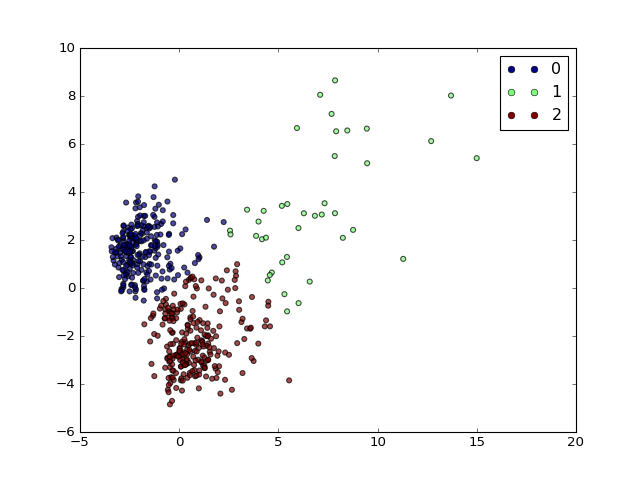

In [85]:
# from the visualization, model12 (with standardization aka scaling of binary features) perform better than model22 
# (without scaling of binary features).

fig1, ax1 = plt.subplots()
scatter = ax1.scatter(X6_mdl12.iloc[:,0], X6_mdl12.iloc[:,1], c= X6_mdl12.loc[:,'labels'], alpha=0.7)
labels = np.unique(X6_mdl12.loc[:,'labels'])
handles = [plt.Line2D([],[],marker="o", ls="", 
                      color=scatter.cmap(scatter.norm(i))) for i in labels]
ax1.legend(handles, labels)

<IPython.core.display.Javascript object>


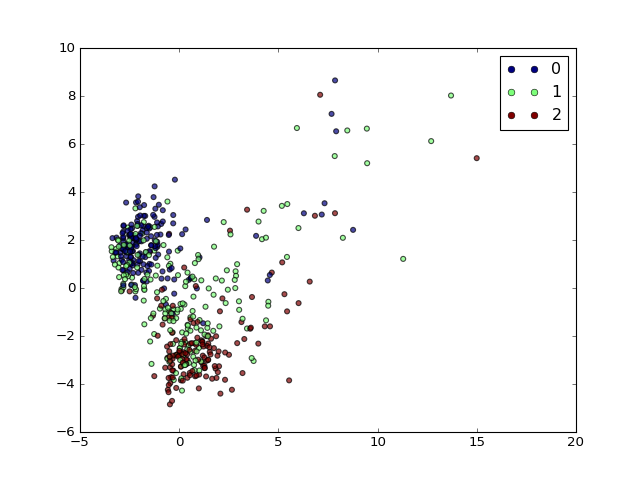

In [86]:
fig2, ax2 = plt.subplots()
scatter = ax2.scatter(X6_mdl22.iloc[:,0], X6_mdl22.iloc[:,1], c= X6_mdl22.loc[:,'labels'], alpha=0.7)
labels = np.unique(X6_mdl22.loc[:,'labels'])
handles = [plt.Line2D([],[],marker="o", ls="", 
                      color=scatter.cmap(scatter.norm(i))) for i in labels]
ax2.legend(handles, labels)